<font size="5"> Zillow Property Value Predictions</font> <br><br>
<font size="5"> Description </font><br><br>
In the rapidly evolving real estate market, accurate property valuation holds immense importance for homeowners and property investors alike. This project is dedicated to developing a predictive model for property values of Single Family Properties that underwent transactions during the year 2017. It directly addresses the critical need to provide accurate property values. We aim to empower our users with valuable insights, aiding in informed decision-making and enhancing their overall experience on the Zillow platform.<br><br>
<font size="5"> Goals </font><br><br>
The primary goal of the Zillow Property Value Predictions project is to predict property values accurately. To achieve this goal, we have established the following objectives:

- **Data Collection and Preprocessing:** Gather and clean Zillow property data to create a comprehensive dataset suitable for analysis.

- **Exploratory Data Analysis:** Perform exploratory analysis to identify trends, patterns, and potential correlations related to the value of the properties.

- **Feature Importance Determination:** Employ machine learning techniques to assess the importance of various features in predicting property values, aiding in identifying critical factors.

- **Model Building and Evaluation:** Develop predictive models for property values, compare their performance, and select the most effective one for accurate value prediction.
<br><br><br><br>
<font size="5"> Imports </font>

In [1]:
# imports:

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor


from prepare import zillow_pipeline, model_pipeline
from explore_plus import perform_spearmanr_test, feature_selections_results, MinMax_Scaler, hot_encode, features
from visuals import plot_value_distribution, area_vs_value_plt, age_vs_value_plt, bedr_vs_value_plt, bathr_vs_value_plt, county_vs_value_plt, area_vs_value_trend_plt
from model_plus import split_train_val_test, scale_train_val_test, data_pipeline, eval_baseline, train_model, poly_features, test_model, eval_model, data_pipeline_fix

<font size="5">Acquire</font>
<br>
<br>
- Data acquired from the 'Zillow' SQL database.
- The database was queried for specific property data for the year `2017`.
- The data consists of `52,246` rows and `7 columns`.
- Each row represents a property with its respective attributes.
- Each column represents a specific property feature

<font size="5">Prepare</font>
<br>
<br>
**Column Renaming:**
-  Columns were renamed for clarity and consistency:
  - bedroomcnt → bedrooms
  - bathroomcnt → bathrooms
  - calculatedfinishedsquarefeet → area
  - taxvaluedollarcnt → value
  - yearbuilt → year

**FIPS Code Mapping:**
- FIPS codes were mapped to county and state names, and two new columns, `county` and `state`, were added to the DataFrame based on the 'fips' column.

**Data Cleaning:**
- Rows with missing values (nulls) were removed from the dataset.
- Rows where either the number of bedrooms or bathrooms was equal to 0 were excluded.
- Columns 'parcelid' and 'fips' were dropped as they contained unnecessary information.

**Data Type Conversion:**
- The data types of specific columns were converted to the 'int' data type for consistency. The columns converted included 'bedrooms,' 'area,' 'value,' and 'year.'

**Data Splitting:**
- The data was split into `training`, `validation`, and `test` sets for machine learning purposes. A `70-15-15` split was applied, with 70% of the data used for training and the remaining 30% split evenly between validation and test sets.

<font size="5">Dictionary</font><br>

| Term Name              | Description                                                |
|------------------------|------------------------------------------------------------|
| bedrooms               | Number of bedrooms in the property.                       |
| bathrooms              | Number of bathrooms in the property.                      |
| area                   | Area of the property in square feet.                      |
| value                  | Property value in dollars.                                |
| year                   | Year the property was built.                              |
| county                 | County where the property is located.                     |
| state                  | State where the property is located.                      |
| total_rooms            | Total number of rooms (bedrooms + bathrooms).             |
| age                    | Age of the property (current year - year built).          |
| bdrm_area_ratio        | Bedroom-to-area ratio.                                    |
| bath_bdrm_ratio        | Bathroom-to-bedroom ratio.                               |
| group_area             | Categorical group based on property area.                 |
| group_age              | Categorical group based on property age.                  |
| FIPS Code              | A numerical code used for mapping locations to county and state names in the dataset. |
| Categorical Grouping   | The process of categorizing data based on percentiles, as used for columns like 'group_area' and 'group_age'. |
| RMSE                   | Root Mean Squared Error, a measure of prediction accuracy in regression models. |
| Outliers               | Data points that deviate significantly from the majority of the data and can affect analysis and modeling. |
| Feature Selection      | Techniques used to select relevant features: SelectKBest, RFE (Recursive Feature Elimination), and Lasso.
| Hyperparameters        | Parameters of a machine learning model that can be tuned to optimize performance. |
| Polynomial Features    | New features created by raising existing features to different powers to capture non-linear relationships. |
| Null Hypothesis (H0)  | The assumption that there is no effect or relationship in hypothesis testing. |
| Alternative Hypothesis (H1) | The opposite of the null hypothesis, suggesting a significant effect or relationship in hypothesis testing. |

<font size="4">A brief look at the data</font><br>

In [2]:
# Execute the zillow_pipeline function to obtain a DataFrame containing Zillow data.
train, val, test = zillow_pipeline()

# Display the first few rows of the training dataset.
train.head()

,bedrooms,bathrooms,area,value,year,county,state
20022,3,2.0,1686,169189,1947,Orange,CA
22947,5,3.5,3658,1193666,1970,Ventura,CA
18000,3,1.0,1040,35983,1927,Los Angeles,CA
10496,3,2.5,2197,657564,1985,Orange,CA
41940,4,4.0,2464,1096680,1987,Los Angeles,CA


<font size="5">Explore</font><br>

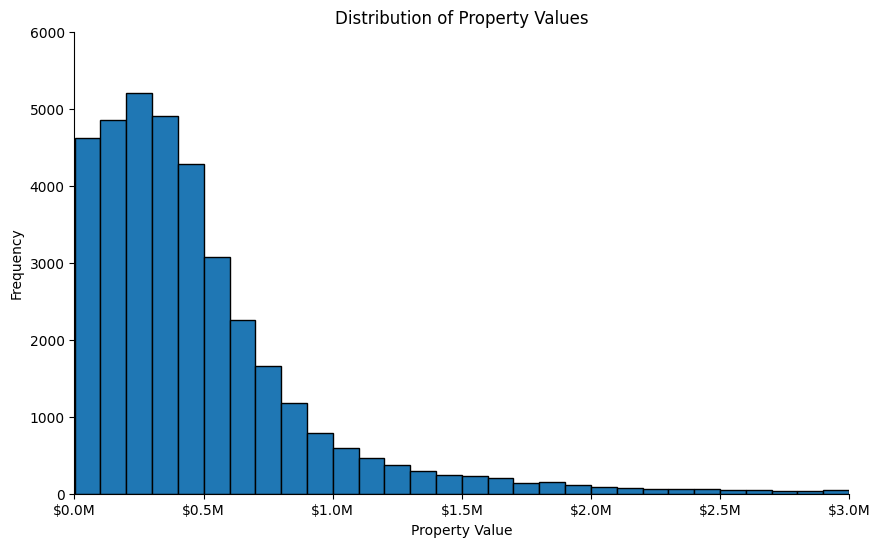

In [3]:
# Display overall value distribution
plot_value_distribution(train)

<font size="4"> **Hypothesis 1: Property Size Impact**</font>
   <font size="3"> 
   
   - *Question:* `Does the size of a property impact its value?`
   </font>

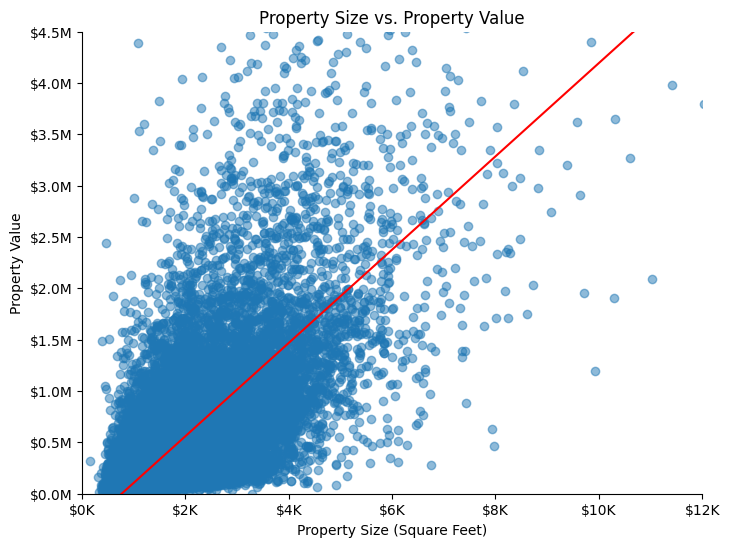

In [4]:
area_vs_value_trend_plt(train)

   - *Null Hypothesis (H0):* There is no significant relationship between property size (square footage) and property value.
   - *Alternative Hypothesis (H1):* Property size (square footage) is significantly related to property value.


In [5]:
perform_spearmanr_test(train,'area')

Result: There is a significant monotonic relationship between area and value (p-value=0.0000, r-value=0.5333).


<font size="4"> **Hypothesis 1: Property Size Impact**</font>
   <font size="3"> 
   
   - *Question:* `Does the age of a property year built influence its value?`
   </font>


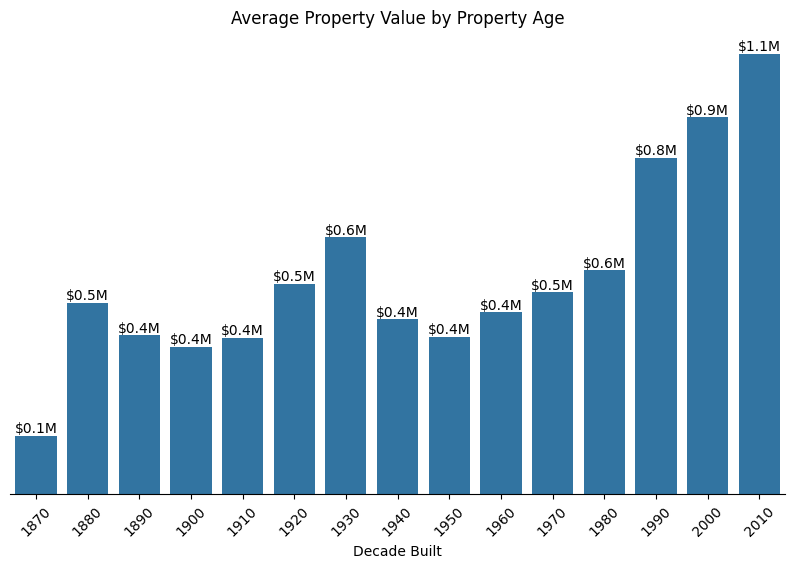

In [6]:
age_vs_value_plt(train)

   - *Null Hypothesis (H0):* There is no significant relationship between the age of a property (year built) and property value.
   - *Alternative Hypothesis (H1):* The age of a property (year built) is significantly related to property value.


In [7]:
perform_spearmanr_test(train,'year')

Result: There is a significant monotonic relationship between year and value (p-value=0.0000, r-value=0.2801).


<font size="4"> **Hypothesis 3: Bedroom and Bathroom Count** </font>
   <font size="3"> 
   
   - *Question:* `Do properties with a higher number of bedrooms or bathrooms tend to have higher values?`
   </font>



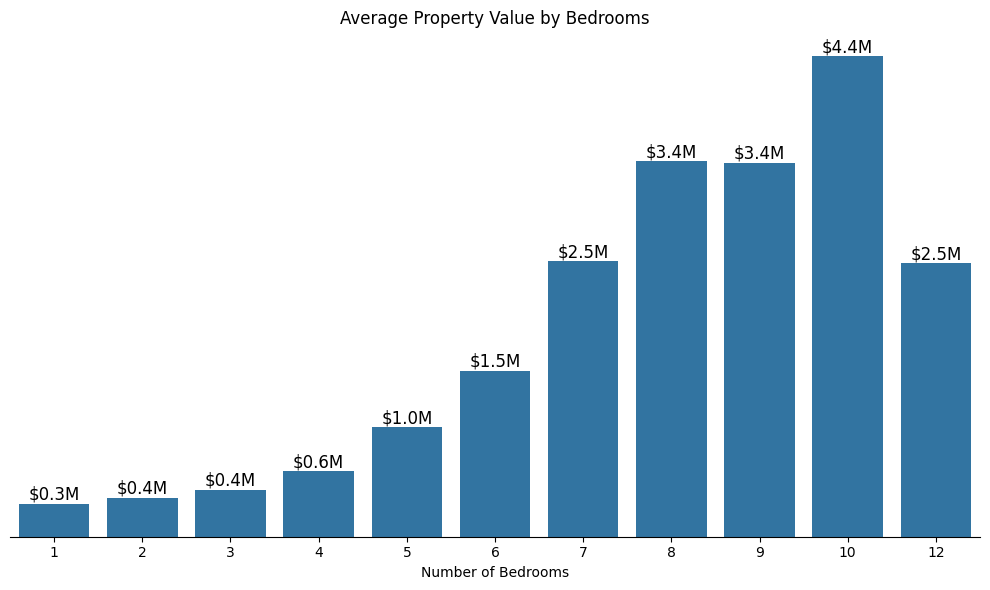

In [8]:
bedr_vs_value_plt(train)

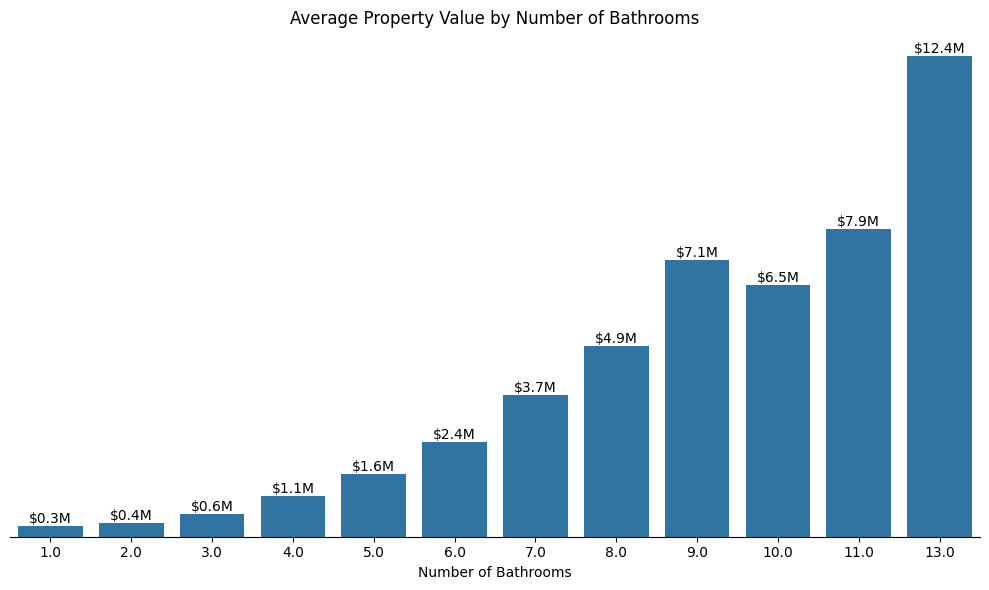

In [9]:
bathr_vs_value_plt(train)

   - *Null Hypothesis (H0):* There is no significant relationship between the number of bedrooms or bathrooms and property value.
   - *Alternative Hypothesis (H1):* The number of bedrooms or bathrooms is significantly related to property value.


In [10]:
perform_spearmanr_test(train,'bedrooms')
perform_spearmanr_test(train,'bathrooms')

Result: There is a significant monotonic relationship between bedrooms and value (p-value=0.0000, r-value=0.3003).
Result: There is a significant monotonic relationship between bathrooms and value (p-value=0.0000, r-value=0.4940).


<font size="4"> **Hypothesis 4: Location Matters**</font>
   <font size="3"> 
   
   - *Question:* `Does the location of a property impact its value?`
   </font>


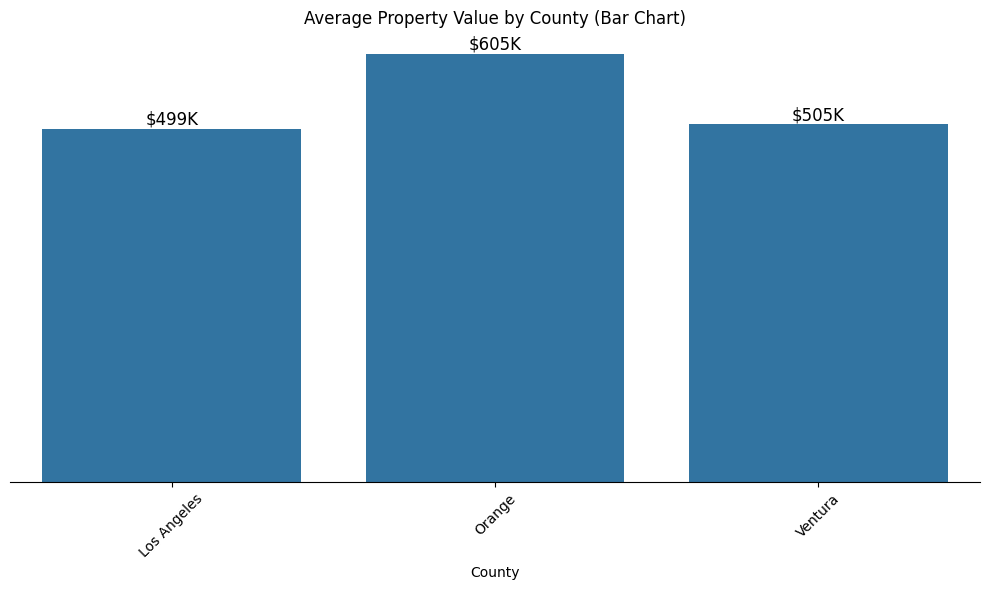

In [11]:
county_vs_value_plt(train)

   - *Null Hypothesis (H0):* There is no significant relationship between the location of a property (county or state) and property value.
   - *Alternative Hypothesis (H1):* The location of a property (county or state) is significantly related to property value.

In [12]:
perform_spearmanr_test(train,'county')

Result: There is a significant monotonic relationship between county and value (p-value=0.0000, r-value=0.1786).


<font size="5">Exploration Summary</font><br>

We performed `PearsonR` test on: 

 - Area
 - Year
 - Bedrooms
 - Bathrooms 
 - County. 
 
 `All indicated a significant monotonic relationship` to value (p-value=0.0).


<font size="5">Feature Engineering</font><br>

6 additional columns:
- *`'total_rooms'`*: Total number of rooms, calculated as the sum of bedrooms and bathrooms.
- *`'age'`*:Age of each entry, calculated as the difference between the current year and the 'year' column.
- *`'bdrm_area_ratio'`*: Bedroom-to-area ratio, calculated as 'area' divided by 'bedrooms'. (2,000sqft / 4bdrm = 500)
- *`'bath_bdrm_ratio'`*: Bathroom-to-bedroom ratio, calculated as 'bathrooms' divided by 'bedrooms'. (2bthrm / 4bdrm = 0.5)
- *`'group_area'`*: categorizes values in the 'area' column based on percentiles. (top_1%', 'middle_50%', 'bottom_1%', ...)
- *`'group_age'`*: categorizes values in the 'age' column based on percentiles. (top_1%', 'middle_50%', 'bottom_1%', ...)

In [14]:
train = features(train)
train.head()

,bedrooms,bathrooms,area,value,year,county,state,total_rooms,age,bdrm_area_ratio,bath_bdrm_ratio,group_area,group_age
20022,3,2.0,1686,169189,1947,Orange,CA,5.0,76,562.000000,0.666667,middle_50%,top_20%
22947,5,3.5,3658,1193666,1970,Ventura,CA,8.5,53,731.600000,0.700000,top_10%,middle_50%
18000,3,1.0,1040,35983,1927,Los Angeles,CA,4.0,96,346.666667,0.333333,bottom_20%,top_10%
10496,3,2.5,2197,657564,1985,Orange,CA,5.5,38,732.333333,0.833333,middle_50%,bottom_25%
41940,4,4.0,2464,1096680,1987,Los Angeles,CA,8.0,36,616.000000,1.000000,top_25%,bottom_20%


In [14]:
train = MinMax_Scaler(train)
train = hot_encode(train)

We performed feature selection using:
 
- `SelectKbest`
- `RFE`
- `LASSO`

In [15]:
feature_selections_results(train, 'value', 4)

,Kbest,RFE,Lasso
0,area,bedrooms,area
1,bathrooms,bathrooms,bedrooms
2,bdrm_area_ratio,total_rooms,bdrm_area_ratio
3,total_rooms,age,bathrooms


<font size="5">Feature Engineering Summary</font><br><br>

After conducting the feature selection methods, `7 features` were selected for modeling. 

We are moving foward with the following features to modeling:

Original
- Area
- Bedrooms
- Bathrooms
- Age

Engineered
- `total_rooms`
- `bdrm_area_ratio`
- `bath_bdrm_ratio`

<font size="5">Modeling</font><br>

- I will use the Root Mean Squared Error `(RMSE)` as my evaluation metric for regression models.
- Models will be `evaluated on train and validate` data
- Baseline RMSE is `$755,431.57` on train data
- The model that performs the best will then be evaluated on test data


<font size="3">Preprocesses for machine learning by: </font><br><br>

- Drop: 
    - 'year'
    - 'county'
    - 'state'
    - 'bath_bdrm_ratio'
    - 'group_area'
    - 'group_age'
<br>
<br>
- Split:
    - 70% training set
    - 5% validation set
    - 15% test set.
<br>
<br>
- Filter train:
    - Bedrooms: Drop more than 6 bedrooms (`bedrooms <= 6`)
    - Bathrooms: Drop more than 6 bathrooms (`bathrooms <= 6`)
    - Area: Drop less than 700sqft or more than 5,500sqft (`700 <= area <= 5,500`)
    - bdrm_area_ratio: Drop less than 100sqft or more than 2,000sqft per bedroom. (`100 <= ratio <= 2,000`)
    - Total dropped: `3%`
<br>
<br>
- Separates features (X) and labels (y) for the training and validation sets
- Scaling using Min-Max.
<br><br>



In [16]:
df = model_pipeline()
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = data_pipeline_fix(df)

Last look at the data for modeling:

In [17]:
train.head()

,bedrooms,bathrooms,area,value,total_rooms,age,bdrm_area_ratio
3491,0.4,0.2,0.245990,248103,0.3,0.391304,0.244679
15404,0.4,0.4,0.317850,1140984,0.4,0.391304,0.308532
14924,0.6,0.2,0.130181,50001,0.4,0.405797,0.080511
16572,0.4,0.0,0.070194,306868,0.2,0.485507,0.088469
46841,0.4,0.0,0.106020,25629,0.2,0.775362,0.120304


Calculate the Root Mean Squared Error `(RMSE)` between actual target values and baseline predictions. <br>
The baseline prediction is computed as the `mean` of the actual target values (y_train).

In [18]:
eval_baseline(y_train)

540065.2435100923

<font size="5">Models</font><br>

<font size="4">Random Forest</font><br><br>


In [19]:
rforest, model_results = train_model(RandomForestRegressor, X_train, y_train, X_val, y_val)

The train RMSE is $182,324.56.
The validate RMSE is $182,324.56.


<font size="3">`Polynomial Features`</font><br><br>

 transforming the original features of a dataset into a set of polynomial features.


In [20]:
X_train, X_val, X_test = poly_features(X_train, X_val, X_test)
X_train.shape

(35743, 28)

<font size="4">XGBoost</font><br><br>


In [21]:
xgbr, model_results = train_model(XGBRegressor, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $295,304.70.
The validate RMSE is $295,304.70.


<font size="4">LassoLars</font><br><br>


In [22]:
lasso, model_results = train_model(LassoLars, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $433,224.11.
The validate RMSE is $433,224.11.


<font size="4">Random Forest</font><br><br>


In [23]:
rforest_test, model_results = train_model(RandomForestRegressor, X_train, y_train, X_val, y_val, model_results)

The train RMSE is $179,983.01.
The validate RMSE is $179,983.01.


<font size="4">`RMSE Results`</font><br><br>

In [24]:
model_results

,Model,Train_RMSE,Val_RMSE
0,RandomForestRegressor,"$182,324.56","$182,324.56"
1,XGBRegressor,"$295,304.70","$295,304.70"
2,LassoLars,"$433,224.11","$433,224.11"
3,RandomForestRegressor,"$179,983.01","$179,983.01"


<font size="5">Comparing Models</font><br><br>

 - XGBoos, LassoLars and RandomForestRegressor models all performed better than baseline.
 - I have chosen to move forward with the `RandomForestRegressor` model as it had a the best predictive performance.

<font size="5">Random Forest Regresor on Test Data</font><br><br>

In [26]:
test_results = test_model(rforest_test, X_test, y_test)

The test RMSE is $179,983.01.


<font size="5">Modeling Summary</font><br><br>

 - `RandomForestRegressor model scored RMSE $181,725` compared to the `baseline of $755,431.57`, it had an improvement of aprox $573,700.
 - After removing outliers, the filtered train data baseline RMSE was $542,142.46, the model improved RMSE by $360,400.

<font size="5">Conclusions</font><br><br>

 - Found a stron relationship between bathrooms, bedrooms and area to the value of the property.
 - Engineered 6 new columns based on the relationships found.
   - *'total_rooms'*
   - *'age'*
   - *'bdrm_area_ratio'*
   - *'bath_bdrm_ratio'*
   - *'group_area'*
   - *'group_age'* <br><br>
 - Performed feature selection to find top features:
 
    Original
    - Area
    - Bedrooms
    - Bathrooms
    - Age

    Engineered
    - total_rooms
    - bdrm_area_ratio
    - bath_bdrm_ratio<br><br>
 - The final model significantly out performed the baseline.

<font size="5">Recommendations</font><br><br>

 - Include more features from the zillow data. 
    - Remove outliers because they skew the data
 - Create additional model to handle outliers.
 - Dive into hyperparameters to improve the models. 